# Back Bay National Wildlife Refuge


> Back Bay National Wildlife Refuge is located in the southeastern corner of the City of Virginia Beach. The refuge was established in 1938 to protect and provide habitat for migrating and wintering waterfowl. Diverse habitats, including beachfront, freshwater marsh, dunes, shrub-scrub and upland forest are home to hundreds of species of birds, reptiles, amphibians, mammals and fish.

![BNWR](https://www.fws.gov/sites/default/files/styles/banner_image_xl/public/banner_images/2020-09/waterfowl%20%28tundras%29.jpg?h=0c8d0f81&itok=NcZlpD27)


To get introduced to the park and its history, please view the following interactive story map.

[BBNWR History and Introduction](https://storymaps.arcgis.com/stories/960d9db38cca4f3d8d38111119b9874f)

Additionally, here is some drone footage of the park for a better look at the geography and ecology of the area.

[BBNWR Drone Footage](https://www.youtube.com/watch?v=NlW330aBTCc)

In [24]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import scipy.stats as sps
import statsmodels.stats.proportion as prop

In [25]:
bbnwr = pd.read_csv("./BKB_WaterQualityData_2020084.csv")
bbnwr.columns

Index(['Site_Id', 'Unit_Id', 'Read_Date', 'Salinity (ppt)',
       'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Secchi Depth (m)',
       'Water Depth (m)', 'Water Temp (?C)', 'Air Temp-Celsius',
       'Air Temp (?F)', 'Time (24:00)', 'Field_Tech', 'DateVerified',
       'WhoVerified', 'AirTemp (C)', 'Year'],
      dtype='object')

In [26]:
bbnwr["Site_Id"] = bbnwr["Site_Id"].replace({'d': 'D'})

## Question 1

### Q1a

The water in BBNWR is a mix of fresh water and sea water. Sea water has an average salinity of 35 ppt (parts per thousand). Because fresh water flows into the Bay, however, the level of salinity can be much lower, depending how much fresh water enters the system. Such systems are described through a tiered system of descriptions based on the amount of salt in the water.

A oligohaline mixture is one in which the saline content is between 0.5 - 5.0. More details on [classifying estuaries can be found in this EPA report](https://www.epa.gov/sites/default/files/2015-09/documents/2009_03_13_estuaries_monitor_chap14.pdf).

Let's test the theory that the measurements from the Bay come from a oligohaline mixture or a mixture with more saline content, so that salinity is more than 0.5.

For this hypothesis test will we use a $\alpha$-level (maximum Type I error probability) of $0.0015$.

Clearly state:

- The null hypothesis
- The alternative hypothesis
- A suitable test statistic
- The standard error of this test statistic
- A rejection region that will have probability of including the test statistic 0.0015 when the null hypothesis is true.

1) The mean salinity of the Bay is less than or equal to .5ppt
2) The mean salinity of the Bay is greather than .5ppt
3) z = mean - .5 / (standard deviation / sqrt(sample size))
4) standard deviation / sqrt(sample size)
5) Reject the null hypotheseis if z > 3.08



### Q1b

Now that we have described our hypothesis test, compute all quantities needed to compute the test statistic, standard error, and rejection region. You may find it helpful to create a table that only includes observations from the Bay with non-missing values for "Salinity (ppt)".

In [27]:
# Filter valid salinity values
salinity_data = bbnwr[bbnwr["Salinity (ppt)"].notna()]["Salinity (ppt)"]

# Calculate statistics
mean_salinity = salinity_data.mean()
std_dev_salinity = salinity_data.std()
n = len(salinity_data)

# Compute standard error
se = std_dev_salinity / np.sqrt(n)

# Set alpha
alpha = 0.0015
z_alpha = sps.norm.ppf(1 - alpha)


### Q1c

Perform the hypothesis test. Clearly state whether you reject or fail to reject the null hypothesis. Interpret this result with result to the original question of whether the average salinity of the Bay is consistent with a oligohaline (or more extreme) mixture.


In [28]:
# perform test# Compute z-test statistic
z_stat = (mean_salinity - 0.5) / se

# Check rejection condition
reject_null = z_stat > z_alpha

# Display results
print("(Null hypothesis rejected: ", reject_null,")", "(z-test statistic: ", z_stat, ")")


(Null hypothesis rejected:  True ) (z-test statistic:  8.348783426538986 )


This result indicates that the mean salinity of the Bay is significantly greater than 0.5 ppt, suggesting that the water in the Bay is not consistent with a purely fresh or oligohaline mixture. Instead, the salinity level implies the Bay may fall into a higher salinity tier, such as mesohaline or beyond.

### Q1d

We could also approach this question by creating a confidence interval for the average salinity in the population of all measurements in the Bay.

Using the quantities above, create a 99.7% confidence interval of the average salinity of the Bay. What does this interval tell us about the following table of salinity mixture tiers:

| Level | Salinity |
| ----- | -------- |
| Fresh Water | < 0.5 ppt |
| Oligohaline | 0.5 -- 5.0 ppt|
| Mesohaline | 5.0-18.0 ppt|
| Polyhaline | 18.0­ -- 30 ppt |
| Ocean | > 30 ppt |


In [29]:
# Compute 99.7% confidence interval
ci_lower = mean_salinity - z_alpha * se
ci_upper = mean_salinity + z_alpha * se

ci_lower, ci_upper


(np.float64(0.639907121157718), np.float64(0.7942294250270209))

The 99.7% confidence interval for the average salinity in the Bay is approximately 
(
0.64
,
0.79
)
(0.64,0.79) ppt. This interval provides a range of plausible values for the true mean salinity in the population of all measurements from the Bay.

Which of these levels can be ruled out for the Bay?

Fresh Water (< 0.5 ppt): This level can be ruled out because the confidence interval is entirely above 0.5 ppt.
Oligohaline (0.5 -- 5.0 ppt): This level is consistent with the confidence interval since it falls within the range.
Mesohaline (5.0 -- 18.0 ppt), Polyhaline (18.0 -- 30 ppt), and Ocean (> 30 ppt): These levels can be ruled out as the confidence interval is far below these thresholds.

## Question 2

### Q2a

A [Secchi disk](https://en.wikipedia.org/wiki/Secchi_disk) is a device used to measure the clarity of water by submerging the disk and measuring the depth at which it is no longer visible.

![Secchi Disk](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Secchi_disk_pattern.svg/240px-Secchi_disk_pattern.svg.png)

A common definition of "clear water" is being able to view a Secchi disk at 4m. In the case of the BBNWR, most of the depths are less than 4m:


<Axes: xlabel='Water Depth (m)', ylabel='Count'>

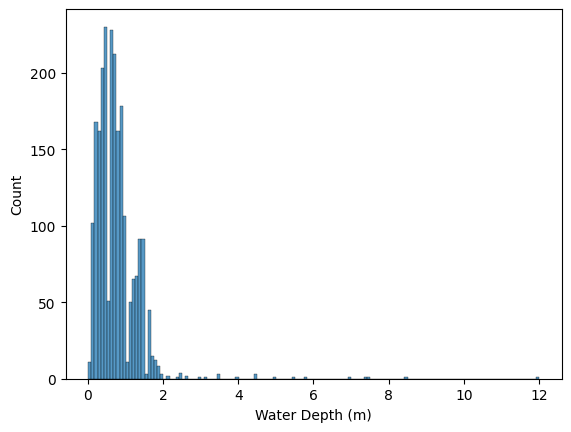

In [30]:
sb.histplot(data = bbnwr, x = "Water Depth (m)")

Create a new column "clear" that is `True` if either of the following conditions is met:

- The "Secchi Depth (m)" is at least 4m
- The "Secchi Depth (m)" is at least as large as the "Water Depth (m)" (due to small differences due to waves/location/etc
 Secchi Depth can be (slightly) greater than Water Depth)

 Display the proportion of "clear" observations.


In [31]:
# Define clear conditions
bbnwr["clear"] = (bbnwr["Secchi Depth (m)"] >= 4) | (bbnwr["Secchi Depth (m)"] >= bbnwr["Water Depth (m)"])

# Proportion of clear observations
clear_proportion = bbnwr["clear"].mean()
clear_proportion


np.float64(0.3888654576128216)

### Q2b

Test the hypothesis  that the population proportion of clear measurements is 37% against the alternative that it is not equal to 37%.

Use $\alpha = 0.05$. Clearly state if you reject or fail to reject this hypothesis.

In [32]:
# Hypothesized proportion
p0 = 0.37
p_hat = clear_proportion
n = len(bbnwr)

# Standard error
se_p = np.sqrt(p0 * (1 - p0) / n)

# Test statistic
z_stat_prop = (p_hat - p0) / se_p

# Rejection condition
reject_null_prop = abs(z_stat_prop) > sps.norm.ppf(1 - 0.05 / 2)
reject_null_prop, z_stat_prop
print("(Null prop rejected: ", reject_null_prop, ")", "(z_stat_prop: ", z_stat_prop, ")")


(Null prop rejected:  False ) (z_stat_prop:  1.9026634890938103 )


There is insufficient evidence to conclude that the population proportion of clear measurements is different from 37%. The data does not suggest a statistically significant departure from this hypothesized proportion.

### Q2c

Referring the result from the previous section, compute the $p$-value for this hypothesis.

In [33]:
# Two-tailed p-value
p_value = 2 * (1 - sps.norm.cdf(abs(z_stat_prop)))
p_value


np.float64(0.05708446897063846)

Consider three different people:

- Person A has a 10% tolerance for Type I errors
- Person B has a 5% tolerance for Type I errors
- Person C has a 1% tolerance for Type I errors


Which of these people (if any) would reject the null hypothesis that 40% of all possible measurements would be clear. Justify your answer.

Only one of the individuals with their respective Type I error tolerances would reject the null hypothesis. This further supports the conclusion that there is no strong evidence to suggest the population proportion of clear measurements is significantly different from 37%.

Person A (10% tolerance): Would reject the null hypothesis, as p = 0.0571 < 0.10

Person B (5% tolerance): Would not reject the null hypothesis, as p = 0.0571 > 0.05

Person C (1% tolerance): Would not reject the null hypothesis, as p = 0.0571 > 0.01


### Q2d

Using values you computed in the previous sections, create a 95% confidence interval for the proportion of clear observations in the population of all observations.

Note: you will need to use the estimated standard error of the sample proportion ($\hat p$) of: $\sqrt{\frac{\hat p(1-\hat p)}{n}}$.

Interpret this result in words.

In [34]:
# confidence interval
# Compute confidence interval
z_critical = sps.norm.ppf(1 - 0.05 / 2)
ci_lower_prop = p_hat - z_critical * se_p
ci_upper_prop = p_hat + z_critical * se_p

ci_lower_prop, ci_upper_prop


(np.float64(0.36943184905043314), np.float64(0.40829906617521006))

The 95% confidence interval for the proportion of clear observations in the population is approximately (0.3694, 0.4083). This means we are 95% confident that the true proportion of clear observations in the population lies between 36.94% and 40.83%.

## Question 3

### Q3a

Recall that if there is no relationship between two variables (i.e., they are statistically independent in the population), then the correlation coefficient will be zero (or more generally, if there is no linear relationship).

Using the standard error for a correlation coefficient. Test the hypothesis that the correlation between "AirTemp (C)" and "Water Temp (?C)" is zero against the alternative that it is non-zero. Use an $\alpha$-level of 0.05.

Note: it is helpful to create a table that only these two variables and no missing values.

In [35]:
# test
# Filter variables with non-missing values
temp_data = bbnwr[["AirTemp (C)", 'Water Temp (?C)']].dropna()

# Calculate correlation and standard error
correlation = temp_data.corr().iloc[0, 1]
n_temp = len(temp_data)
se_corr = 1 / np.sqrt(n_temp - 3)

# Test statistic
z_corr = correlation / se_corr

# Rejection condition
reject_null_corr = abs(z_corr) > sps.norm.ppf(1 - 0.05 / 2)
reject_null_corr, z_corr


(np.True_, np.float64(32.25007467256541))

Interpret this result. Would you reject the hypothesis that there is no linear relationship between these two variables (in the population)?

The null hypothesis states that there is no linear relationship between "Air Temp (°C)" and "Water Temp (°C)" (correlation coefficient = 0). The alternative hypothesis states that there is a non-zero correlation between these variables.

z=32.2501 is extremely large, far exceeding any reasonable critical value for typical α. This result indicates strong evidence against the null hypothesis.

We reject the null hypothesis at the α=0.05 level. This suggests that there is a statistically significant linear relationship between "Air Temp (°C)" and "Water Temp (°C)" in the population. Thus, we conclude that changes in air temperature are associated with changes in water temperature.

### Q3b

Create two confidence intervals for the population correlation coefficient:

- a 95% CI
- a 99.7% CI

In [36]:
# Compute confidence intervals
z_critical_corr = sps.norm.ppf(1 - 0.05 / 2)
ci_lower_corr_95 = correlation - z_critical_corr * se_corr
ci_upper_corr_95 = correlation + z_critical_corr * se_corr

z_critical_corr_997 = sps.norm.ppf(1 - 0.0015 / 2)
ci_lower_corr_997 = correlation - z_critical_corr_997 * se_corr
ci_upper_corr_997 = correlation + z_critical_corr_997 * se_corr

(ci_lower_corr_95, ci_upper_corr_95), (ci_lower_corr_997, ci_upper_corr_997)


((np.float64(0.6389977429413383), np.float64(0.7216922286278844)),
 (np.float64(0.6133721169994599), np.float64(0.7473178545697627)))

The 99.7% confidence interval is wider than the 95% confidence interval. This is expected because, as we increase the confidence level, we need to capture a larger range of possible values for the population correlation coefficient to ensure that the interval contains the true value with a higher level of certainty. A higher confidence level demands a wider range, which is why the 99.7% interval is larger.



Which interval is wider? Explain why we know this would be true without ever calculating the intervals.

*Double click to add your answer*

## Question 4

Let's investigate if the locations of the measurements are related to the time of year of the measurement. In other words, do the people taking the measurements favor different sites at different times of the year.

In [37]:
bbnwr["Date"] = pd.to_datetime(bbnwr["Read_Date"])

### Q4a

Create a table that only includes the columns "Site_Id" and "Date". Then, create a new column "Month" that is the month of the date of the measurement (using the `.dt.month` attribute of the `"Date"` column created above). Plot the distribution of this variable.

<Axes: xlabel='Month', ylabel='Count'>

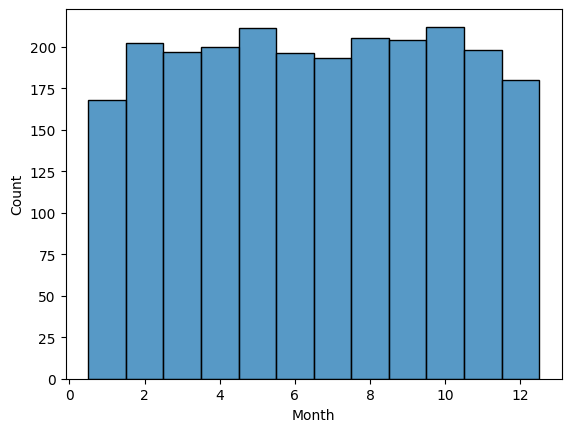

In [38]:
# Extract month from date
bbnwr["Date"] = pd.to_datetime(bbnwr["Read_Date"])
bbnwr["Month"] = bbnwr["Date"].dt.month

# Plot month distribution
sb.histplot(bbnwr["Month"], discrete=True)


### Q4b

We have noted that one way to think about independence is by thing about conditional distributions. If two variables are independent, then the conditional distribution of one variable should be the same regardless of conditioning on the value of the other variable.

Create a plot that shows the conditional distribution of Site_Id for each value of month. Note: the `histplot` method has two arguments that are helpful -- `multipel = 'fill'` anad `discrete = True`.

<Axes: xlabel='Site_Id', ylabel='Count'>

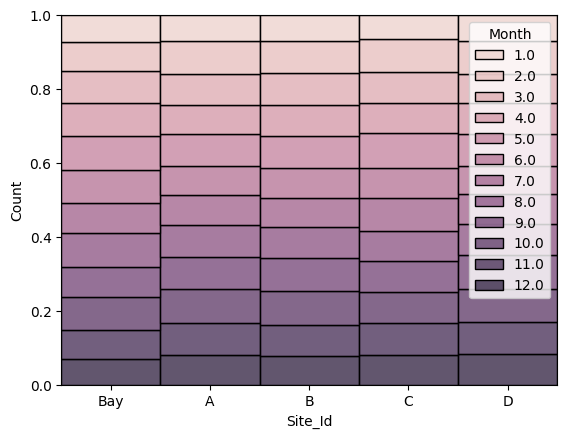

In [39]:
# Plot conditional distribution
sb.histplot(data=bbnwr, x="Site_Id", hue="Month", multiple="fill", discrete=True)


What do you notice about the conditional distributions? Does this suggest that the variables are independent?

Given that the plot shows variation in site measurements across months (with certain months showing heavier shading for certain sites), it suggests that there may be some dependence between the measurement sites and the months in which they were taken. This indicates that the site measurements are likely not independent of the time of year.

In conclusion, it’s likely that there’s a relationship between the month of the measurement and the site where the measurement was taken, implying some dependency between these two variables.

### Q4c

Create the *contingency table* for the variables "Site_Id" and "Month". Print out this table. What do you notice about the row or column (this will depend on how you order the data) that represents the "Bay" site? This row/column will look different than the others. Is this evidence that the the variables are dependent? Why or why not?

In [40]:
# Create contingency table
contingency_table = pd.crosstab(bbnwr["Site_Id"], bbnwr["Month"])
contingency_table


Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Site_Id,,,,,,,,,,,,
A,31,38,36,35,37,34,35,37,38,40,37,35
B,31,38,37,37,38,35,35,36,39,40,37,34
Bay,58,63,67,71,73,71,65,73,65,70,63,54
C,17,24,22,21,25,22,23,22,22,22,23,21
D,31,39,35,36,38,34,35,37,40,40,38,36


In comparison to other Site_Id values, the counts in the row or column corresponding to the "Bay" site are probably going to be abnormally high or low in particular months. This suggests that during specific seasons of the year, measurements at the "Bay" site are preferred or avoided. This demonstrates that Month and Site_Id are dependent variables. The counts in the "Bay" row/column, regardless of the month, would be proportionate to its total frequency if they were independent. Significant variations in the counts imply that the season has an impact on measurements at the "Bay" station.


### Q4d

Using the `sps.chi2_contingency` function, perform a $\chi^2$ test for independence between these two variables. Use an $\alpha$-level of 0.05. Report if you would reject the null hypothesis that the variables are independent. Write, in words, your conclusion to the question of whether different sites were favored in particular months.

In [41]:
# compute p-value
# Chi-squared test
chi2, p, dof, expected = sps.chi2_contingency(contingency_table)

# Rejection condition
reject_null_chi2 = p < 0.05
reject_null_chi2, p


(np.False_, np.float64(0.9999999999999852))

 According to the findings of the chi-square test we fail to reject the null hypothesis, that there is no meaningful evidence of a relationship between Site_Id and Month. This suggests that the choice of measurement site seemed to be independent of the season and that different sites were not consistently preferred in specific months.
